# Anemia Detection and Severity Classification in Kenya : A predictive statistics

## 1. Business Understanding

### (a) Introduction


The Kenya Medical Research Institute(KEMRI) is a state corporation established in Kenya in 1979 through the Science and Technology Act, Cap 250 of the Laws of Kenya. It operates under the Science Technology and Innovation Act, 2013 as the national body responsible for carrying out research in human health in Kenya. KEMRI is the medical research arm of the government and provides advice to the Ministry of Health(MOH) on various aspects of healthcare and delivery.

KEMRI's mission is to improve human health and quality of life through research , capacity builging , innovation and service delivery. The Institute conducts research under seven research programs including Biotechnology, Public Health and Health Systems, Sexual Reproductive Adolescent and Child health,Natural Products and Drug Development, Infectios and Parasitic Diseases and Non-Communicable Diseases.

Within the Health Sector, KEMRI is responsible for providing leadership in health research and development, shaping the health research agenga, setting norms and standards, articulating evidence-based policy options, monitoring and assessing health trends as well as dealing with trans-boundary threats and disease outbreaks. The institute further continues to be responsive the challenges of emerging and re-emerging diseases including Non-Communicable Diseases and communicable conditions and bio-terrorism.

Anemia is one of the diseaes that have posed a significant public health problem. Anemia is a condition in which the body lacks enough red blood cells to carry oxygen to the body's tissues. According to the World Health Organization, anemia is a serious global public health problem that particularly affects young children, mensturating adolescent girls, pregnant and postpaturm women.Anemia can be classified in three different levels based on its severity. The severity of the anemia is determined by measuring the level of haemoglobin in the blood.These levels are mild,moderate and severe.

In this project we aim to develop predictive models utilizing factors such as Red blood Cell count,age, sex,white bllod cell count etc to help predict the presence of anemia and its severity in different persons. By critically analyzing this different factors we will be able to help KEMRI which was commisioned by the Ministry of Health to improve on the current diagnostic tools on anemia detection in terms of efficiency and accuracy. By doing this we aim to encourage accurate early predictions which may ultimately lead to accelerated interventions.













### (b) Problem Statement

Efficient and accurate anemia detection, coupled with precise severity measurement, presents a critical challenge in modern healthcare, especially in the context of Kenya's medical landscape. The current diagnostic tools lack the precision needed for early identification, leading to delayed interventions, suboptimal patient outcomes, and escalated healthcare costs due to preventable hospitalizations. In response to this, the Kenya Medical Research Institute (KEMRI), commissioned by the Ministry of Health (MOH), is embarking on a pioneering project. Our goal is to develop predictive models utilizing comprehensive blood count (CBC) parameters, age, and gender data, harnessing the power of machine learning. These models will ease the identification of anemia, to the benefit of patients, healthcare proffesionals, KEMRi and the MOH. Solving this problem may significantly enhance patient care, improve medical decision-making, and alleviate healthcare burdens, contributing data-driven insights to inform healthcare policies and strategies.

### (c) Defining Metrics of Success

The predictive model will be successful if it provides a well defined picture of health care utilization in respect to age, gender and the Comprehensive Blood Count in the blood sample.


### (d) Research Questions

<br>•Based on CBC, age, and gender, how can we forecast the presence of anemia and its severity as early as possible?
<br>•Which age group of the population is most susceptible to anemia?
<br>•What are the effects the symptoms and impacts of Anemia to a human body?
<br>•What effects does anemia have on the various genders?
<br>•What effects does anemia have on people's performance and quality of life?


### (e) Objectives

1. Determine normal reference ranges for key CBC parameters in this population overall and stratified by age and sex
2. Examine the relationship between age and abnormal CBC findings
3. Calculate the proportion of patients with abnormal results for each CBC parameter
4. Compare the prevalence of abnormal CBC results between males and females
5. Analyze the association between RBC indices and anemia to understand RBC characteristics in anemic patients


### (f) Data Understanding
The dataset is derived from complete blood count (CBC) tests performed using a Hematology analyzer. The dataset comprises 11 attributes for each patient, including age, gender, and various CBC parameters such as hemoglobin (HGB) level, mean cell volume (MCV), mean cell hemoglobin (MCH), mean cell hemoglobin concentration (MCHC), red cell distribution width (RDW), red blood cell count (RBC), white blood cell count (WBC), platelet count (PLT), and packed cell volume (PCV). The attributes have specific ranges associated with normal values for each parameter. These ranges provide context for evaluating the health status of patients and identifying deviations from the normal ranges that could indicate the presence of anemia.

1. **Age:** Numerical attribute representing the current age of the patients. The age range is between 11 and 100 years.

2. **Gender:** Categorical attribute representing the gender of the patient. The possible values are Male and Female.

3. **Hemoglobin (HGB):** Numerical attribute indicating the level of hemoglobin in the blood. The normal range for hemoglobin is between 11 and 16 g/dL.

4. **Mean Cell Volume (MCV):** Numerical attribute indicating the mean volume of a red blood cell. The normal range for MCV is between 80 and 101 fL.

5. **Mean Cell Hemoglobin (MCH):** Numerical attribute indicating the mean amount of hemoglobin in a red blood cell. The normal range for MCH is between 27 and 32 pg.

6. **Mean Cell Hemoglobin Concentration (MCHC):** Numerical attribute indicating the mean concentration of hemoglobin in a red blood cell. The normal range for MCHC is between 31 and 37 g/dL.

7. **Red Cell Distribution Width (RDW):** Numerical attribute indicating the variation in the size of red blood cells. The normal range for RDW is between 11 and 16%.

8. **Red Blood Cell Count (RBC):** Numerical attribute indicating the count of red blood cells per microliter of blood. The normal range for RBC is between 3.80 and 4.80 million/uL.

9. **White Blood Cell Count (WBC):** Numerical attribute indicating the count of white blood cells per microliter of blood. The normal range for WBC is between 3.5 and 11.5 thousand/uL.

10. **Platelet Count (PLT):** Numerical attribute indicating the count of platelets per microliter of blood. The normal range for platelet count is between 150 and 450 thousand/uL.

11. **Packed Cell Volume (PCV):** Numerical attribute indicating the volume percentage of red blood cells in whole blood. The normal range for PCV is between 36 and 46.



### importing necessary libraries

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# loading the dataset
df = pd.read_csv("CBC data_for_meandeley_csv.csv")

In [20]:
df.head(4)

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4


The data seems to have two column names. 

In [21]:
#changing column names
names = ["S.NO","Age","Sex","Red Blood Cell count",
                 	"Packed Cell Volume","Mean Cell Volume",
                    "Mean Cell Hemoglobin",	"MCHC","Red Cell Distribution width",
                    "White Blood Cell (WBC count)","Platelet","Hemoglobin"]
df.columns = names
df.head()

,S.NO,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


dropping the first row and the first column

In [22]:
#dropping the first row
df = df.drop([0],axis=0)
df.drop("S.NO",axis = 1, inplace = True)
df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5


Getting the shape of the data

In [23]:
# shape of the data
df.shape

(373, 11)

The dataset has 12 columns and 373 rows

In [24]:
# datatypes of different columns in the data set
datatypes = df.dtypes
dname = [ "DataType"]
dtypedf=pd.DataFrame(datatypes )
dtypedf.columns = dname
dtypedf

,DataType
Age,float64
Sex,float64
Red Blood Cell count,object
Packed Cell Volume,object
Mean Cell Volume,object
Mean Cell Hemoglobin,object
MCHC,float64
Red Cell Distribution width,object
White Blood Cell (WBC count),object
Platelet,object


The dataset has a both columns which are strings and floats.

In [25]:
# sum of missing data per column
df.isna().sum()

Age                             9
Sex                             9
Red Blood Cell count            9
Packed Cell Volume              9
Mean Cell Volume                9
Mean Cell Hemoglobin            9
MCHC                            9
Red Cell Distribution width     9
White Blood Cell (WBC count)    9
Platelet                        9
Hemoglobin                      9
dtype: int64

In [26]:
#dropping the missing data
df.dropna(inplace = True)

Checking for duplicate

In [27]:
df.duplicated().sum()

8

df.isna().sum()

The data has no duplicated elements

The data has no duplicated elements

converting the data types into their respective data type

In [28]:
# Convert columns to respective data types
df["Age"] = df["Age"].astype(float)
df["Sex"] = df["Sex"].astype(float)
df["Red Blood Cell count"] = df["Red Blood Cell count"].astype(float)
df["Packed Cell Volume"] = df["Packed Cell Volume"].astype(float)
df["Mean Cell Volume"] = df["Mean Cell Volume"].astype(float)
df["Mean Cell Hemoglobin"] = df["Mean Cell Hemoglobin"].astype(float)
df["MCHC"] = df["MCHC"].astype(float)
df["Red Cell Distribution width"] = df["Red Cell Distribution width"].astype(float)
df["White Blood Cell (WBC count)"] = df["White Blood Cell (WBC count)"].astype(float)
df["Platelet"] = df["Platelet"].astype(float)
df["Hemoglobin"] = df["Hemoglobin"].astype(float)

In [29]:
df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [30]:
df.dtypes

Age                             float64
Sex                             float64
Red Blood Cell count            float64
Packed Cell Volume              float64
Mean Cell Volume                float64
Mean Cell Hemoglobin            float64
MCHC                            float64
Red Cell Distribution width     float64
White Blood Cell (WBC count)    float64
Platelet                        float64
Hemoglobin                      float64
dtype: object

statistical summary

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,364.0,44.917582,18.780854,11.00,28.000,44.500,60.000,89.00
Sex,364.0,0.442308,0.497344,0.00,0.000,0.000,1.000,1.00
Red Blood Cell count,364.0,4.278736,0.820166,1.36,3.780,4.335,4.800,6.90
Packed Cell Volume,364.0,36.762912,6.830835,13.10,32.900,36.800,41.850,56.90
Mean Cell Volume,364.0,87.509121,9.332164,55.70,83.175,87.950,91.875,124.10
Mean Cell Hemoglobin,364.0,28.227143,3.865998,14.70,26.300,28.200,30.400,41.40
MCHC,364.0,32.053407,2.801790,23.60,30.300,31.700,33.300,50.20
Red Cell Distribution width,364.0,15.116511,2.176557,10.60,13.600,14.800,16.100,29.20
White Blood Cell (WBC count),364.0,8.863571,4.868502,2.00,5.900,7.935,10.205,42.42
Platelet,364.0,223.750824,99.407153,10.00,153.000,210.000,268.250,660.00


Checking for outliers using boxplot

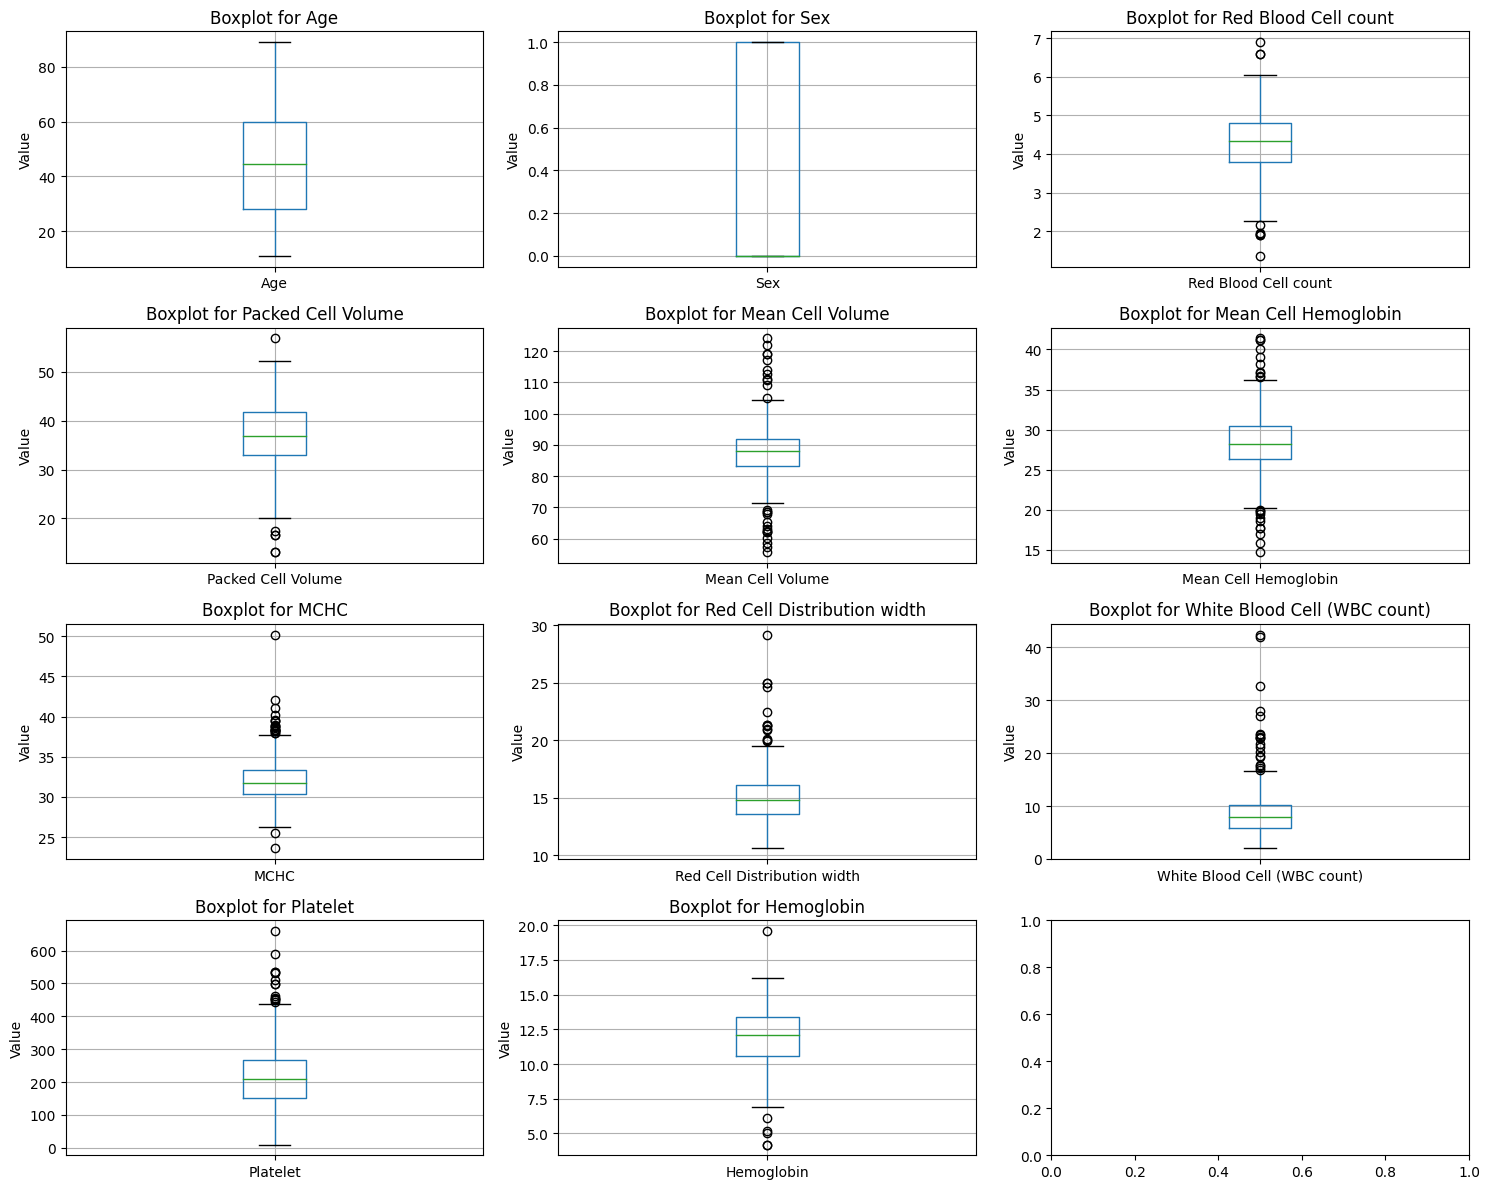

In [32]:
selected_columns = [
    'Age',
    'Sex',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet',
    'Hemoglobin'
]
# Determine the number of rows and columns for the grid
num_rows = 4
num_cols = 3
# Create a grid of boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))
axes = axes.flatten()

# Create individual labeled boxplots for each column
for i, column in enumerate(selected_columns):
    ax = axes[i]
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


# Exploratory Data Analysis

In [36]:
df.head(3)

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4


Since haemoglobin is a protein on the surface of the red blood cell. We will understand how they are colerrated

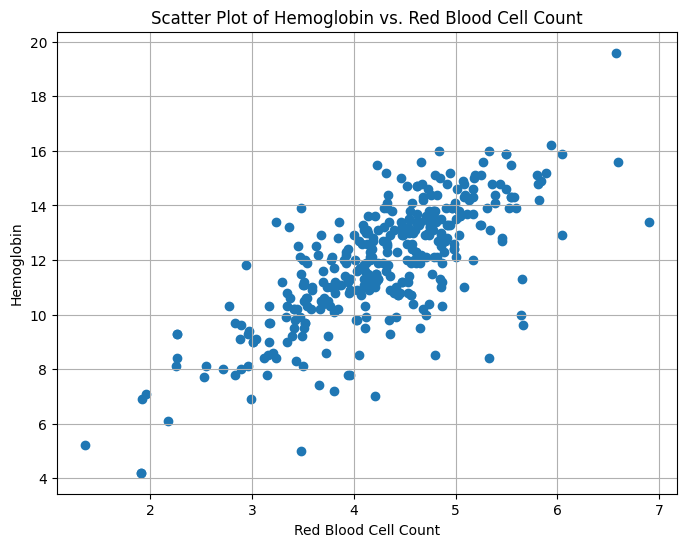

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Red Blood Cell count'], df['Hemoglobin'])
plt.title('Scatter Plot of Hemoglobin vs. Red Blood Cell Count')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('Hemoglobin')
plt.grid(True)
plt.show()

In [44]:
cor = np.corrcoef(df['Red Blood Cell count'],df['Hemoglobin'])
print(f"The correlation coefficient is {round(cor[0][1],4)}")

The correlation coefficient is 0.7465


Haemoglobin and red blood cell count have a positive correlation. The correlation is 0.7465 indicating moderatly correlated. 



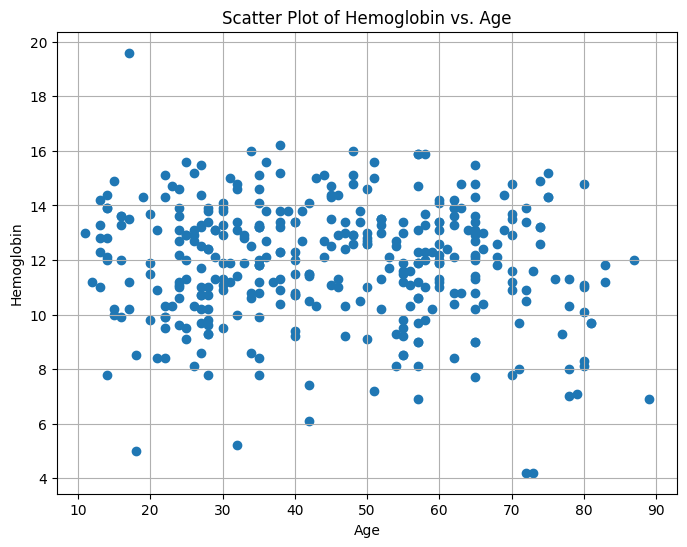

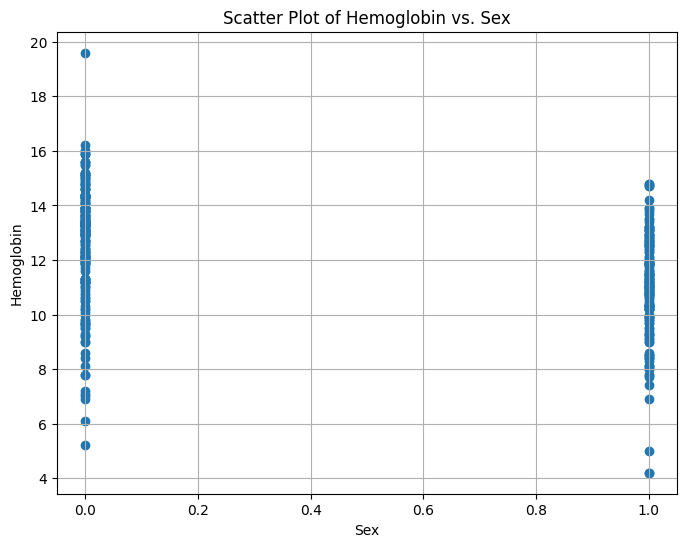

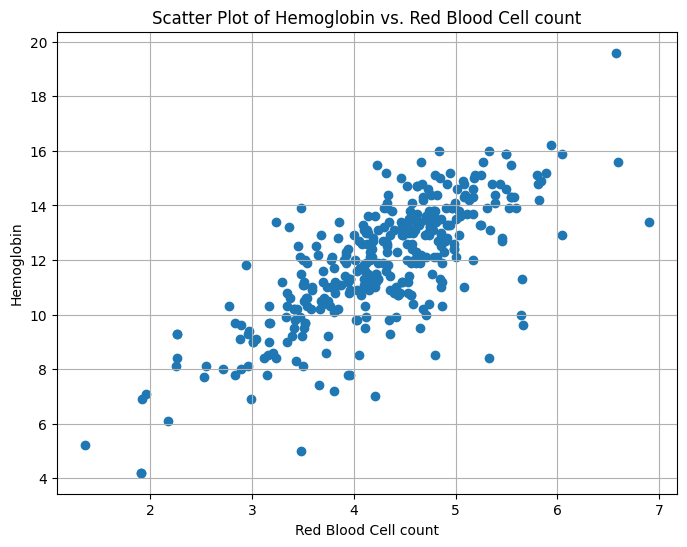

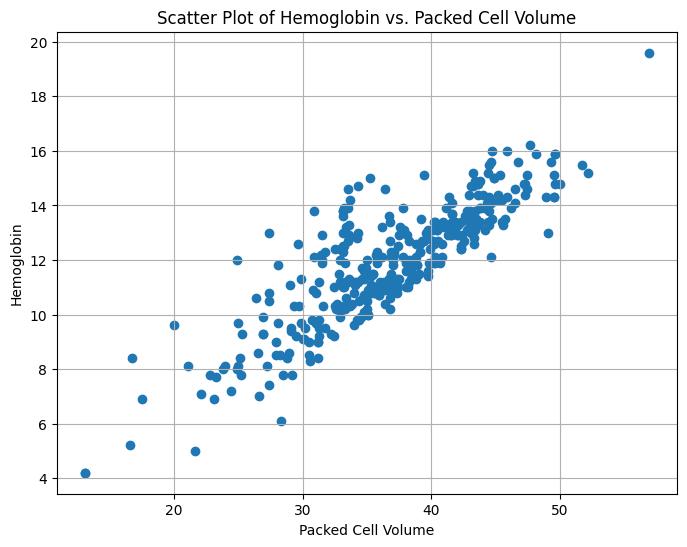

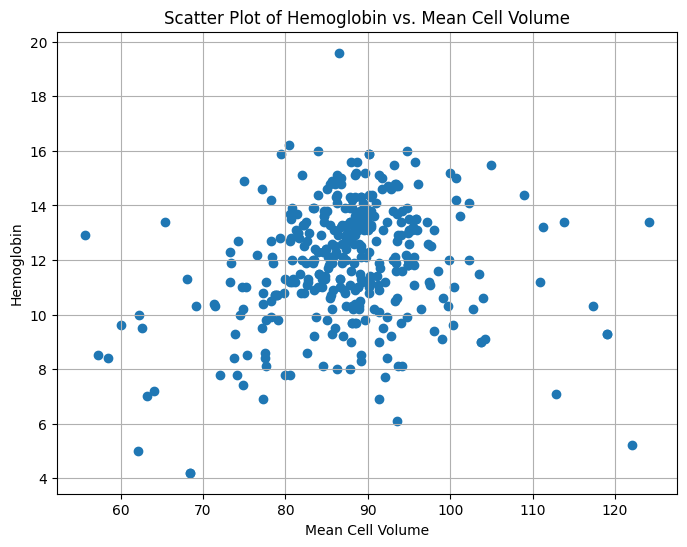

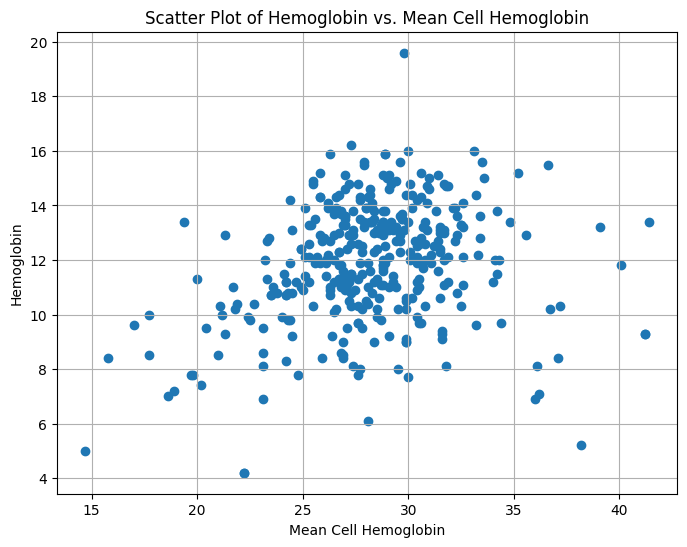

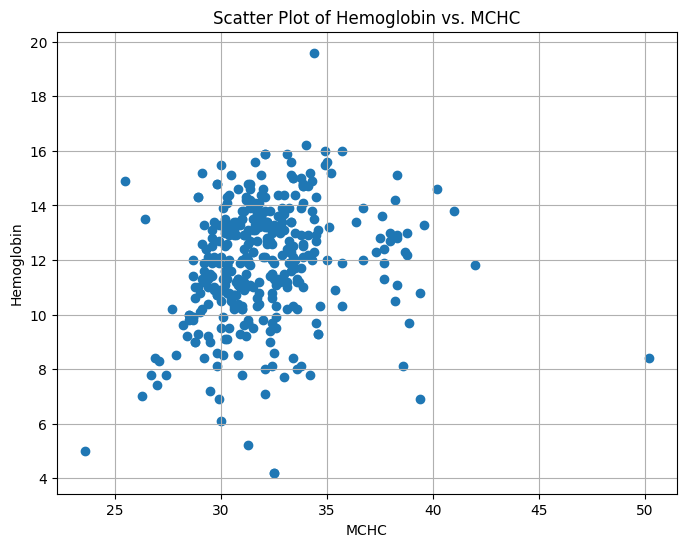

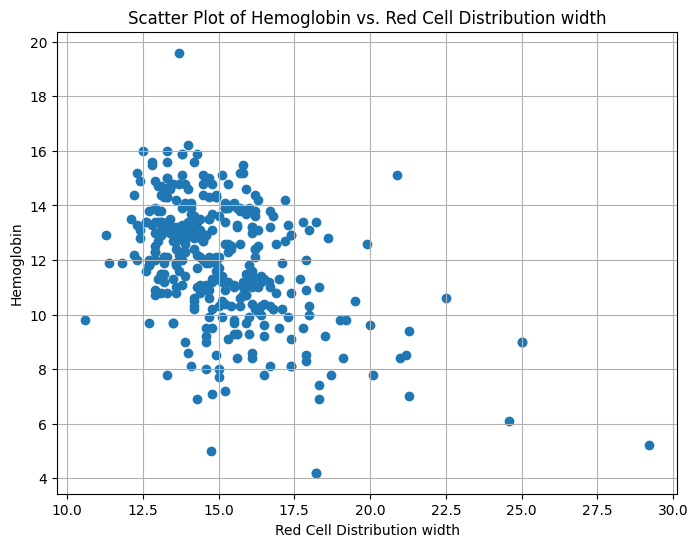

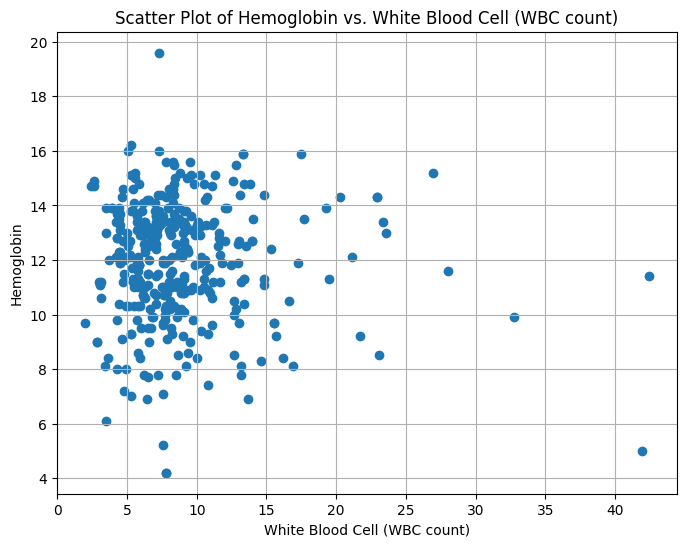

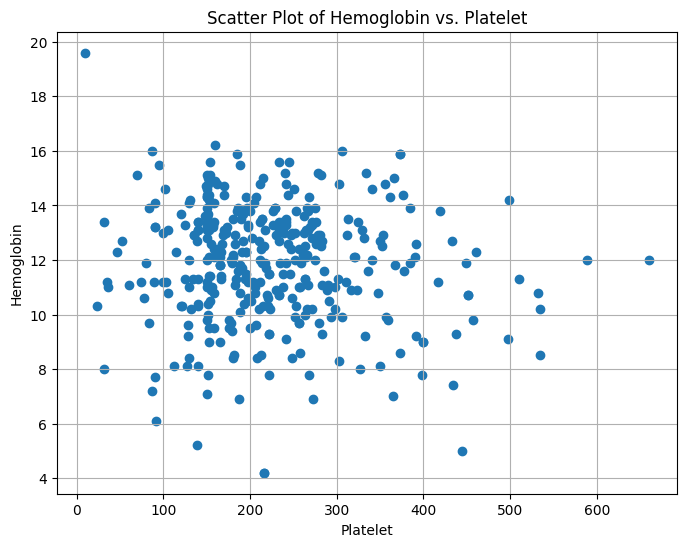

In [46]:
columns_for_scatter = [
    'Age',
    'Sex',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet'
]
for column in columns_for_scatter:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['Hemoglobin'])
    plt.title(f'Scatter Plot of Hemoglobin vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Hemoglobin')
    plt.grid(True)
    plt.show()